In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random


dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

n_data = data.shape[0]
x = data[:, 0]
y = data[:, 1]

label = np.array([random.randint(0,4) for i in range(n_data)]).reshape(n_data, 1)
initial_label = label.copy()

class0 = (label[:, 0] == 0)
class1 = (label[:, 0] == 1)
class2 = (label[:, 0] == 2)
class3 = (label[:, 0] == 3)
class4 = (label[:, 0] == 4)

init_class0 = class0.copy()
init_class1 = class1.copy()
init_class2 = class2.copy()
init_class3 = class3.copy()
init_class4 = class4.copy()

In [92]:
def compute_distance(a, b):
    
    dist = math.sqrt( (a[0] - b[0])**2 + (a[1] - b[1])**2 )  #distance between a and b#
    return dist


def compute_centroid(Z):

    c = np.zeros(shape = (5, 2), dtype = np.float64)  #centroid of a set of points in P#
    
    for i in range(n_data):
        c[label[i].item()][0] += Z[i][0]
        c[label[i].item()][1] += Z[i][1]
        
    if np.sum(class0) != 0:
        c[0] /= np.sum(class0)
    
    if np.sum(class1) != 0:
        c[1] /= np.sum(class1)
        
    if np.sum(class2) != 0:
        c[2] /= np.sum(class2)
        
    if np.sum(class3) != 0:
        c[3] /= np.sum(class3)
        
    if np.sum(class4) != 0:
        c[4] /= np.sum(class4)

    return c

centroid = compute_centroid(data)
initial_c = centroid.copy()

def compute_label(z, M):
    label = np.zeros(shape =(n_data, 1), dtype = np.int64) #label of point z with a set of centroids M#
    
    for i in range(n_data):
        dist = np.zeros(shape = (5, 1), dtype = np.float64)
        dest = z[i]
        
        for j in range(5):
            dist[j] = compute_distance(dest, centroid[j]);
        label[i] = dist.argmin()

    classify(label)
    
    return label

def classify(label):
    global class0, class1, class2, class3, class4
    
    class0 = (label[: , 0] == 0)
    class1 = (label[: , 0] == 1)
    class2 = (label[: , 0] == 2)
    class3 = (label[: , 0] == 3)
    class4 = (label[: , 0] == 4)
    
def compute_loss(C, M):
    loss = 0
    for i in range(n_data):
        loss += compute_distance(C[i], M[label[i].item()])
    return loss

def centroid_of_cluster(c):
    distance = np.zeros(shape=(5, 1), dtype = np.float32)
    
    for i in range(5):
        distance[i] = compute_distance([0, 0], c[i])
    return distance


    

In [93]:
n_iter = 100
centroid_cluster = np.empty((100, 5, 1))
L_iters = []


In [94]:
for i in range(n_iter):
    L_iters.append(compute_loss(data, centroid))
    centroid_cluster[i] = centroid_of_cluster(centroid)
    label = compute_label(data, centroid)
    centroid = compute_centroid(data)
    

1. Plot the data points

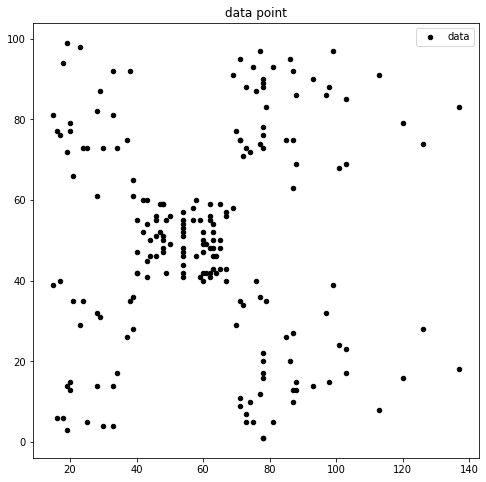

In [101]:
plt.figure(1, figsize = (8, 8))
plt.scatter(x, y, c = 'black', s = 80, marker = '.', label = 'data')
plt.title('data point')
plt.legend()
plt.show()

2. Visualise the initial condition of the point labels

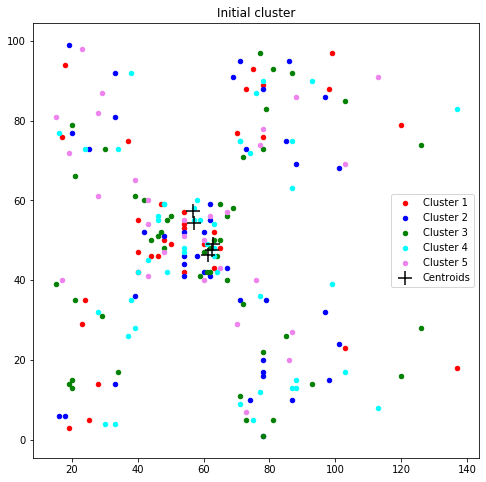

In [102]:
plt.figure(1, figsize = (8, 8))
plt.scatter(x[init_class0], y[init_class0], c='red', s=80, marker='.', label='Cluster 1')
plt.scatter(x[init_class1], y[init_class1], c='blue', s=80, marker='.', label='Cluster 2')
plt.scatter(x[init_class2], y[init_class2], c='green', s=80, marker='.', label='Cluster 3')
plt.scatter(x[init_class3], y[init_class3], c='cyan', s=80, marker='.', label='Cluster 4')
plt.scatter(x[init_class4], y[init_class4], c='violet', s=80, marker='.', label='Cluster 5')
plt.scatter(initial_c[:, 0], initial_c[:, 1], c='black', s=200, marker='+', label='Centroids')   
plt.title('Initial cluster')
plt.legend()
plt.show()

3. plot the loss curve

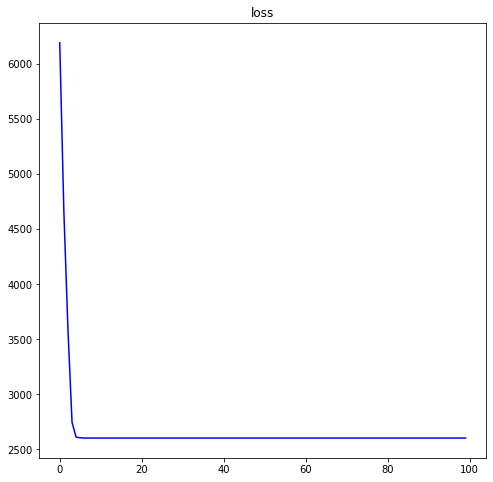

In [103]:
plt.figure(1, figsize = (8, 8))
plt.plot(np.array(range(n_iter)), L_iters, c = 'blue')
plt.title('loss')
plt.show()

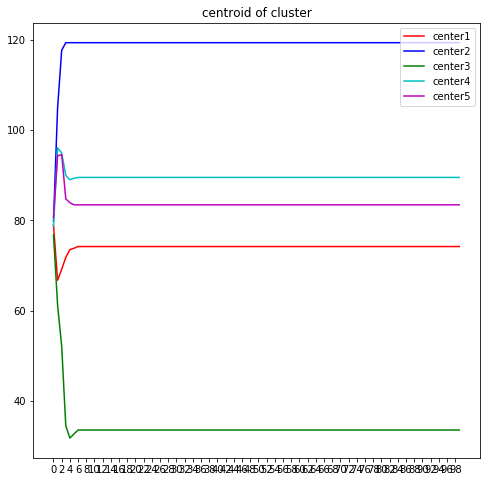

In [104]:
plt.figure(1, figsize=(8, 8))
plt.plot(np.array(range(n_iter)), centroid_cluster[:, 0], c='r', label='center1')
plt.plot(np.array(range(n_iter)), centroid_cluster[:, 1], c='b', label='center2') 
plt.plot(np.array(range(n_iter)), centroid_cluster[:, 2], c='g', label='center3')
plt.plot(np.array(range(n_iter)), centroid_cluster[:, 3], c='c', label='center4') 
plt.plot(np.array(range(n_iter)), centroid_cluster[:, 4], c='m', label='center5')
plt.xticks(range(0, 100, 2))
plt.title('centroid of cluster')
plt.legend(loc='upper right')
plt.show()

4. Plot the final cluster result

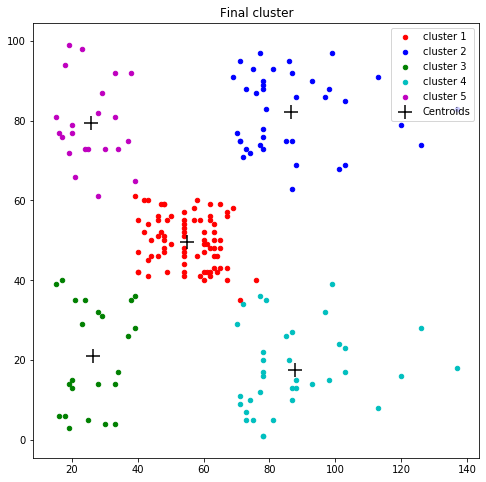

In [105]:
plt.figure(1, figsize=(8, 8))
plt.scatter(x[class0], y[class0], c = 'r', s = 80, marker = '.' , label = 'cluster 1')
plt.scatter(x[class1], y[class1], c = 'b', s = 80, marker = '.' , label = 'cluster 2')
plt.scatter(x[class2], y[class2], c = 'g', s = 80, marker = '.' , label = 'cluster 3')
plt.scatter(x[class3], y[class3], c = 'c', s = 80, marker = '.' , label = 'cluster 4')
plt.scatter(x[class4], y[class4], c = 'm', s = 80, marker = '.' , label = 'cluster 5')
plt.scatter(centroid[:, 0], centroid[:, 1], c='black', s=200, marker='+', label='Centroids')
plt.legend(loc='upper right')
plt.title('Final cluster')
plt.show()